In [4]:
import pandas as pd
import numpy as np
import time
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import os

In [5]:
# https://chrisalbon.com/python/data_visualization/matplotlib_grouped_bar_plot/

In [6]:
fig_path = '../Figures/'
os.listdir(fig_path)

['a. Bill - Cluster 0.png',
 'AIC_BIC_SARIMA.png',
 'Average Monthly demand per consumer.png',
 'b. Consumption - Cluster 0.png',
 'boxplots_signals.png',
 'c. Bill - Cluster 2.png',
 'Consumptions and bills.png',
 'd. Consumption - Cluster 2.png',
 'daily demand line.png',
 'Demand for different tarrifs.png',
 'group mean demand demand.png',
 'heatmap hourly consumption.png',
 'heatmaps hourly consumption per season.png',
 'histogram daily consumption per season.png',
 'mae_offset_SARIMA.png',
 'mape_SARIMA.png',
 'PCA_clustering.png',
 'Percentage of Acorn Groups.png',
 'r_squared_SARIMA.png',
 'sarima_summary.PNG',
 'Scores for clusters.png',
 'Silhouette Score.png',
 'testing_SARIMA.png',
 'training_SARIMA.png',
 'TSNE_clustering.png',
 'violin plot daily consumption by month.png']

In [7]:
path = '../Dataset/Power Networks/Power-Networks-LCL-June2015(withAcornGps).csv_Pieces/'
filename = '2013_agg_dates.csv'
t = time.time()
df = pd.read_csv(path+filename)
elapsed = time.time() - t

In [8]:
df.head()

,Unnamed: 0,LCLid,stdorToU,DateTime,Acorn,Acorn_grouped,Entries,kwh,Minute,Month,Hour,Day,DayName,Weekday,kw,MonthName,Season,WeekNumber
0,0,MAC000002,Std,2013-01-01 00:00:00,ACORN-A,Affluent,17520,0.219,0,1,0,1,Tuesday,1,0.438,January,Winter,1
1,1,MAC000002,Std,2013-01-01 00:30:00,ACORN-A,Affluent,17520,0.241,30,1,0,1,Tuesday,1,0.482,January,Winter,1
2,2,MAC000002,Std,2013-01-01 01:00:00,ACORN-A,Affluent,17520,0.191,0,1,1,1,Tuesday,1,0.382,January,Winter,1
3,3,MAC000002,Std,2013-01-01 01:30:00,ACORN-A,Affluent,17520,0.235,30,1,1,1,Tuesday,1,0.470,January,Winter,1
4,4,MAC000002,Std,2013-01-01 02:00:00,ACORN-A,Affluent,17520,0.182,0,1,2,1,Tuesday,1,0.364,January,Winter,1


In [9]:
df['LCLid'].nunique()

1132

# Percentages of Acorn Groups

In [10]:
cons = df['LCLid'].nunique() # count of consumers
perc_cons = df.groupby(['Acorn_grouped', 'stdorToU'])['LCLid'].nunique().reset_index() # count of consumers in every group

In [11]:
perc_cons['Percentage'] = perc_cons['LCLid']/cons*100 # Percentage of consumers in every group

In [12]:
# Dictionary with indexes for the group names
x_dict = dict(zip(perc_cons['Acorn_grouped'].unique().tolist(), [i for i in range(0, perc_cons['Acorn_grouped'].nunique())]))

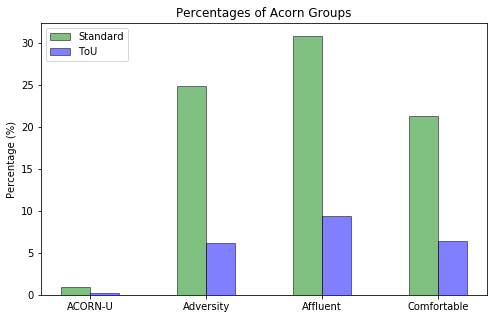

In [13]:
width = 0.25

# Define x and y axis
X = np.array(list(x_dict.values()))
tou = perc_cons['Percentage'].loc[perc_cons['stdorToU'] == 'ToU']
std = perc_cons['Percentage'].loc[perc_cons['stdorToU'] == 'Std']

# Plot bars
fig, ax = plt.subplots(figsize = (8, 5))
ax.bar(X, std, width, color = 'green', alpha = 0.5, edgecolor = 'black')
ax.bar(X+width, tou, width, color = 'blue', alpha = 0.5, edgecolor = 'black')

# Plot axes
ax.set_xticks(X+width/2)
ax.set_xticklabels(list(x_dict.keys()))

# Set the y axis label
ax.set_ylabel('Percentage (%)')

# Set the chart's title
ax.set_title('Percentages of Acorn Groups')
# Set legend
plt.legend(['Standard', 'ToU'], loc='upper left')
# Save
plt.savefig(fig_path+'Percentage of Acorn Groups.png')
# Show
plt.show()

# Mean monthly consumption per group

In [15]:
monthly = df.groupby(['Acorn_grouped', 'stdorToU','Month'])['kw'].sum().reset_index() # monthly sums
perc_cons = df.groupby(['Acorn_grouped', 'stdorToU'])['LCLid'].nunique().reset_index().rename(columns = {'LCLid': 'count'}) # count of consumers
month_ave = pd.merge(monthly, perc_cons, how = 'outer', on=['Acorn_grouped', 'stdorToU']) # merge

In [16]:
month_ave['kw per consumer'] = month_ave['kw']/month_ave['count'] 
perc_cons = month_ave.groupby(['Acorn_grouped', 'stdorToU'])['kw per consumer'].mean().reset_index().rename(columns = {'kw per consumer':'kw'})

In [17]:
x_dict = dict(zip(perc_cons['Acorn_grouped'].unique().tolist(), [i for i in range(0, perc_cons['Acorn_grouped'].nunique())]))
perc_cons['Acorn_grouped'].unique().tolist()

['ACORN-U', 'Adversity', 'Affluent', 'Comfortable']

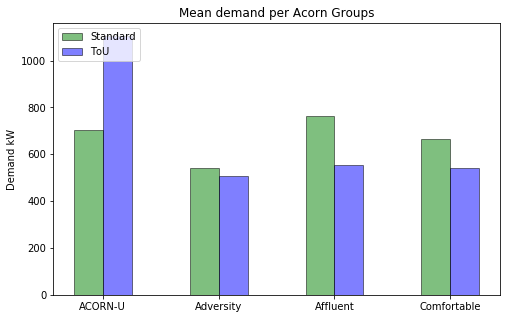

In [21]:
width = 0.25

# Define x and y axis
X = np.array(list(x_dict.values()))
temp = perc_cons.groupby(['Acorn_grouped', 'stdorToU'])['kw'].mean().reset_index()
tou = temp.loc[temp['stdorToU'] == 'ToU']
std = temp.loc[temp['stdorToU'] == 'Std']

# Plot bars
fig, ax = plt.subplots(figsize = (8, 5))
ax.bar(X, std['kw'], width, color = 'green', alpha = 0.5, edgecolor = 'black')
ax.bar(X+width, tou['kw'], width, color = 'blue', alpha = 0.5, edgecolor = 'black')

# Plot axes
ax.set_xticks(X+width/2)
ax.set_xticklabels(list(x_dict.keys()))

# Set the y axis label
ax.set_ylabel('Demand kW')

# Set the chart's title
ax.set_title('Mean demand per Acorn Groups')
# Set the chart's title
plt.legend(['Standard', 'ToU'], loc='upper left')
# Save
plt.savefig(fig_path+'Average Monthly demand per consumer.png')
# Plot
plt.show()